## Percolation and the Giant Connected Component (GCC)

The Giant Connected Component is, like the name suggests, the biggest connected component in a graph. Interestingly when studying this, we come across *percolation*, which is a phenomena existent across fields (e.g. propagation of forest fires, phase trasitions in Ising-like models). The notion of percolation is used to study the emergence of a GCC in Erdős–Rényi Random Graphs $G(n,p)$.



Example of percolation of a 2D lattice. In this case you see percolation, i.e., most of the system is connected to each other (in black). <img src="https://upload.wikimedia.org/wikipedia/commons/f/f6/Percolation.gif" alt="percolation of a 2D lattice" width="200" height="200">

##  Percolation in Random Graphs
Design a method to identify the connected components in any graph $G$. Naturally the properties to study emerge in Erdős–Rényi Random Graphs $G(n,p)$.

 - If $p=0$ ($G(n,0)$) we have a graph with $n$ vertices and no edges
 - If $p=1$ ($G(n,1)$) we have a graph with have a fully connected graph, i.e., everyone is connected to everyone (so the GCC is the graph).

Analytically if the *mean degree* $c < 1$ there is no GCC, and if $c > 1$, there should be a CGG with some relative size $s$, i.e., number of vertices in the GCC $n_{GCC}$ in comparison with $n$. The mean degree $c=\frac{p}{n-1}$. Reproduce Newman's result:

![](https://cs.slu.edu/~esposito/teaching/1080/webscience/images/random-components-v2.jpg)


In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
def connected_component_sizes(G_):

    components = list(nx.connected_components(G_))

    component_sizes = [len(component) for component in components]
 
    return component_sizes

In [11]:
def connected_component_sizes_alternative(G_):

    visited = []    
    components_sizes = []
    
    for i in range(G_.number_of_nodes()): 
        
        if i not in visited:
            comp_size = 1 
            
            queue = [i]
            visited.append(i) 
            
            while queue: 
                
                for k in list(G_.neighbors(queue[0])):
                    if k not in visited:
                        queue.append(k)
                        visited.append(k) 
                        
                        comp_size += 1
                queue.pop(0)
                
        components_sizes.append(comp_size)
            
    return components_sizes

In [38]:

def GCC_size(N, c_lims=(0, 3.5), res=50, numberpts=50):
    
    c = np.linspace(min(c_lims), max(c_lims), numberpts) 
    S = []
    
    for i in tqdm(c):
        max_GCC_size = 0
        for j in range(res):
            G = nx.erdos_renyi_graph(N, i/(N-1))
            component_sizes = connected_component_sizes(G)
            max_GCC_size += max(component_sizes)/res
            
        S.append(max_GCC_size / N)
    
    return c, S

In [40]:
N = 500

In [41]:
c, S = GCC_size(N)

100%|███████████████████████████████████████████| 50/50 [01:02<00:00,  1.25s/it]


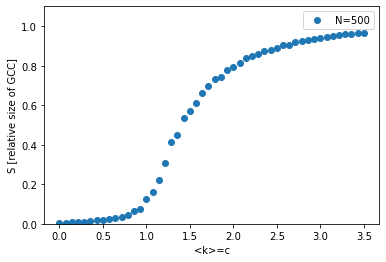

In [42]:
plt.plot(c, S, ls="", marker='o', label='N={}'.format(N))
plt.xlabel("<k>=c")
plt.ylabel("S [relative size of GCC]")
plt.ylim([0,1.1])
plt.legend()